

# Explanation of the Advanced Calculator Code with Graph Plotting Support
---

### [By Srushti Shimpi](https://github.com/srushtishimpi)

---
## Introduction

This Python program implements an **Advanced Calculator** with a graphical user interface (GUI) using the `tkinter` library. It supports various mathematical operations including basic arithmetic, trigonometric functions, logarithms, exponentials, factorials, percentages, and constants like π and e. Additionally, it features a **graph plotting** capability that allows users to plot mathematical expressions containing the variable `x` over a specified range.

The code is structured as a class `AdvancedCalculator` that extends `tk.Tk`, organizing the GUI creation, input handling, expression evaluation, and graph plotting within its methods.

---

## Detailed Explanation

### 1. **Imports and Setup**

- **tkinter**: For building the GUI.
- **math module functions**: Includes `sin`, `cos`, `tan`, `log`, `sqrt`, `factorial`, `pi`, and `e` for mathematical calculations.
- **re**: For regular expressions to parse and transform input expressions.
- **matplotlib.pyplot and numpy**: For plotting graphs and generating numerical ranges of `x` values.

### 2. **GUI Construction (`_build_ui`)**

- An **Entry widget** serves as the calculator's display, showing the current input or result.
- Buttons for digits, operations, functions, and special commands (`C`, `=`, and `Plot`) are created and arranged on a grid.
- Each button is linked to the `_on_button_click` handler method that determines its action.

### 3. **Input Handling (`_on_button_click`)**

- **Clear ('C')**: Clears the display.
- **Equal ('=')**: Evaluates the expression entered and displays the result or an error if the expression is invalid.
- **Plot ('Plot')**: Triggers graph plotting for expressions involving the variable `x`.
- **Other buttons**: Append their character/text to the current expression in the display.

### 4. **Expression Evaluation (`_evaluate`)**

- Preprocessing steps:
  - Replace caret `^` with Python exponentiation operator `**`.
  - Replace constants `pi` and `e` with their numerical values.
  - Convert factorial notation (`!`) to calls to `factorial()` function.
  - Convert percentages (e.g., `50%`) into decimal fractions `(50/100)`.
- Mathematical functions (`sin`, `cos`, `tan`, `log`, `ln`, `sqrt`, `exp`) are mapped to their Python equivalents in a `funcs` dictionary.
- Uses regular expressions to safely replace function names with dictionary lookups, avoiding direct code execution risks.
- **Variable substitution for graphing**: If an `x_val` is provided (during graph plotting), every occurrence of `'x'` in the expression string is replaced by the actual numeric value (e.g., `'x'` → `(2.5)`).
- The processed expression is then evaluated using Python’s `eval()` in a restricted context that only allows access to the predefined mathematical functions and factorial, enhancing security.

### 5. **Factorial Replacement (`_replace_factorial`)**

- Uses regex to identify factorial notation patterns (numbers or parenthesized expressions followed by `!`).
- Replaces them with the function call format `factorial(...)` so they can be evaluated properly.

### 6. **Percentage Replacement (`_replace_percentage`)**

- Converts occurrences of percentages like `45%` into `(45/100)`, allowing them to be evaluated as decimals.

### 7. **Graph Plotting (`_plot_graph`)**

- Generates an array of 400 `x` values between -10 and 10 using `numpy.linspace`.
- For each `x`, evaluates the user-entered expression by substituting `x` with the current value, calculating the corresponding `y`.
- Handles evaluation errors gracefully by inserting `NaN` to keep graph continuity.
- Uses `matplotlib` to plot the curve of `y` versus `x` with appropriate labels, grid, and legend.

---




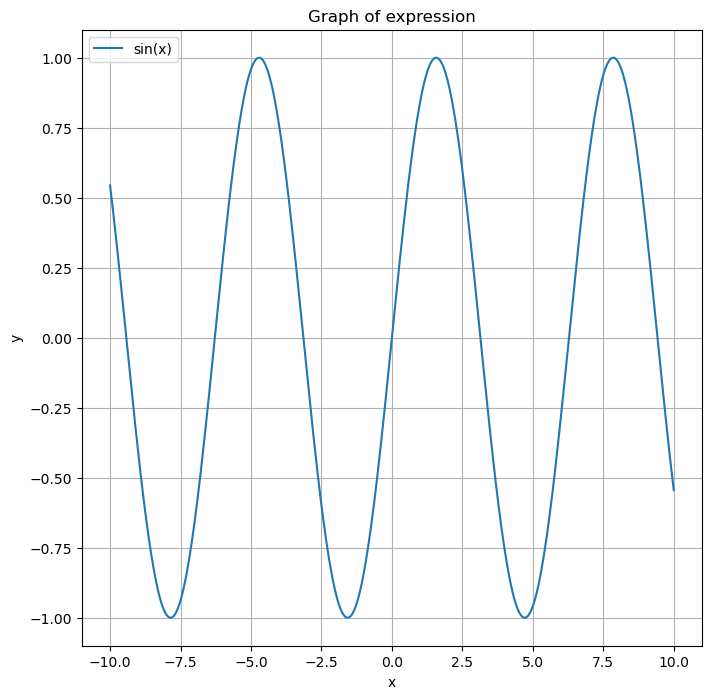

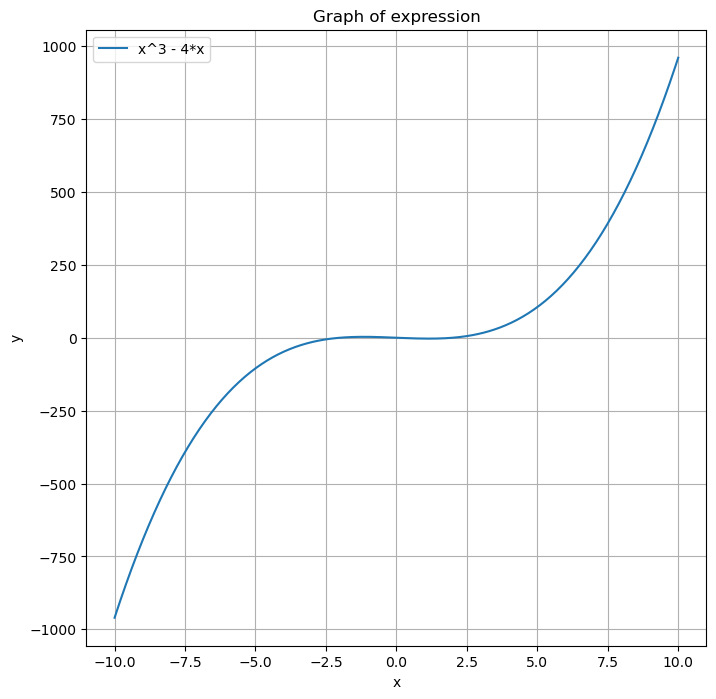

In [ ]:
# NOTE: tkinter must be installed and available in your environment.
# If running this code on a server or sandbox without GUI support, it will not work.

try:
    import tkinter as tk  # Import tkinter for GUI
except ImportError:
    raise ImportError("tkinter is not available in your Python environment. Please run this code on a local machine with a GUI.")

from math import sin, cos, tan, log, sqrt, factorial, pi, e
import re
import matplotlib.pyplot as plt  # For plotting graphs
import numpy as np  # For generating x values for the graph

class AdvancedCalculator(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Advanced Calculator")
        self.resizable(False, False)
        self._build_ui()

    def _build_ui(self):
        # Entry widget for the calculator display
        self.display = tk.Entry(self, font=("Arial", 20), bd=10, relief=tk.RIDGE, justify='right')
        self.display.grid(row=0, column=0, columnspan=6, ipady=10)

        # Define calculator buttons (text, row, column)
        buttons = [
            ('7',1,0), ('8',1,1), ('9',1,2), ('/',1,3), ('sqrt',1,4), ('C',1,5),
            ('4',2,0), ('5',2,1), ('6',2,2), ('*',2,3), ('^',2,4), ('(',2,5),
            ('1',3,0), ('2',3,1), ('3',3,2), ('-',3,3), ('ln',3,4), (')',3,5),
            ('0',4,0), ('.',4,1), ('%',4,2), ('+',4,3), ('log',4,4), ('!',4,5),
            ('sin',5,0), ('cos',5,1), ('tan',5,2), ('pi',5,3), ('exp',5,4), ('=',5,5),
            ('Plot',6,0),  # Button to trigger graph plotting
        ]

        # Create and place buttons on grid, assign command on click
        for (text, row, col) in buttons:
            btn = tk.Button(self, text=text, width=5, height=2, font=("Arial", 14),
                            command=lambda t=text: self._on_button_click(t))
            btn.grid(row=row, column=col, padx=2, pady=2)

    def _on_button_click(self, char):
        # Handle different button clicks
        if char == 'C':
            # Clear the display
            self.display.delete(0, tk.END)
        elif char == '=':
            # Evaluate the expression currently in display
            expr = self.display.get()
            try:
                result = self._evaluate(expr)
                self.display.delete(0, tk.END)
                self.display.insert(tk.END, result)
            except Exception:
                # If evaluation fails, show Error
                self.display.delete(0, tk.END)
                self.display.insert(tk.END, 'Error')
        elif char == 'Plot':
            # Plot graph for expression containing 'x'
            expr = self.display.get()
            try:
                self._plot_graph(expr)
            except Exception:
                self.display.delete(0, tk.END)
                self.display.insert(tk.END, 'Plot Error')
        else:
            # For all other buttons, insert their text into the display
            self.display.insert(tk.END, char)

    def _evaluate(self, expr, x_val=None):
        """
        Evaluate the mathematical expression 'expr'.
        If x_val is provided, replace 'x' in expr with that value (for graphing).
        """

        # Replace caret '^' with Python exponent operator '**'
        expr = expr.replace('^', '**')

        # Replace mathematical constants with their numerical values
        expr = expr.replace('pi', str(pi))
        expr = expr.replace('e', str(e))

        # Replace factorial notation like '5!' with 'factorial(5)'
        expr = self._replace_factorial(expr)

        # Replace percentage symbol '%' with division by 100 (e.g., 50% -> 0.5)
        expr = self._replace_percentage(expr)

        # Dictionary of math functions supported by the calculator
        funcs = {
            'sin': sin,
            'cos': cos,
            'tan': tan,
            'log': lambda x: log(x, 10),  # Log base 10
            'ln': log,                    # Natural logarithm
            'sqrt': sqrt,
            'exp': lambda x: e**x,
        }

        # Replace function names with dictionary access, e.g., sin -> funcs["sin"]
        for name in funcs:
            expr = re.sub(r'\b' + name + r'\b', f'funcs["{name}"]', expr)

        # If evaluating for graphing (x_val provided),
        # replace every occurrence of 'x' in the expression with the actual numeric value
        # so the expression becomes a valid Python expression for that specific x.
        if x_val is not None:
            expr = expr.replace('x', f'({x_val})')

        # Evaluate the expression in a restricted context (only allowed funcs)
        context = {'__builtins__': None, 'funcs': funcs, 'factorial': factorial}
        return eval(expr, context)

    def _replace_factorial(self, expr):
        """
        Converts factorial notation like '5!' or '(3+2)!' into 'factorial(5)' or 'factorial(3+2)' for evaluation.
        Uses regex to find occurrences.
        """
        pattern = r'(\d+\.?\d*|\([^\)]+\))!'  # Matches a number or parentheses expression followed by '!'
        while re.search(pattern, expr):
            match = re.search(pattern, expr)
            group = match.group(1)
            # Replace 'group!' with 'factorial(group)'
            expr = expr[:match.start()] + f'factorial({group})' + expr[match.end():]
        return expr

    def _replace_percentage(self, expr):
        """
        Converts percentages like '50%' into decimal equivalents like '(50/100)'.
        """
        pattern = r'(\d+\.?\d*)%'
        while re.search(pattern, expr):
            match = re.search(pattern, expr)
            number = match.group(1)
            # Replace 'number%' with '(number/100)'
            expr = expr[:match.start()] + f'({number}/100)' + expr[match.end():]
        return expr

    def _plot_graph(self, expr):
        """
        Plot the graph of the expression with respect to x.
        Supports expressions containing 'x' variable.
        """
        # Generate 400 points between -10 and 10 for smooth graph
        x_vals = np.linspace(-10, 10, 400)
        y_vals = []

        # Evaluate the expression for each x value
        for x in x_vals:
            try:
                y = self._evaluate(expr, x_val=x)
                y_vals.append(y)
            except Exception:
                # If evaluation fails at some x, append None to maintain graph continuity
                y_vals.append(np.nan)

        # Plot the graph using matplotlib
        plt.figure(figsize=(8, 8))
        plt.plot(x_vals, y_vals, label=expr)
        plt.title("Graph of expression")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.grid(True)
        plt.legend()
        plt.show()

if __name__ == '__main__':
    app = AdvancedCalculator()
    app.mainloop()


### Square root of 12
![sqrt(144)](1.JPG)![Answer](2.JPG)
---
### Plot for sin(x) as shown above
![sin(x)](3.JPG)

---
### Plot for x^3 - 4*x as shown above
![x^3 - 4*x](4.JPG)

---

## Summary

This program offers a feature-rich advanced calculator with both **complex expression evaluation** and **dynamic graph plotting** capabilities wrapped in an intuitive GUI. The design carefully processes user input by parsing and transforming mathematical expressions safely before evaluation. By supporting variable substitution, it extends the calculator into a graphing tool, enabling visualization of mathematical functions.

The modular approach with helper functions for factorial and percentage handling, and the controlled evaluation environment, balances flexibility with security, making it a robust example of combining GUI programming with computational mathematics in Python.

---


# END